make Azimutha Equal Distance Projection  
using map_templateb_table.html 

In [242]:
from collections import defaultdict
import vmapper
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, GeometryCollection
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

from catppuccin_palette import catppuccin as cpc
import mplcatppuccin
from mplcatppuccin.palette import load_color
from mplcatppuccin.colormaps import get_colormap_from_list
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
#from jinja2 import Environment, PackageLoader, select_autoescape
import jinja2

<Axes: >

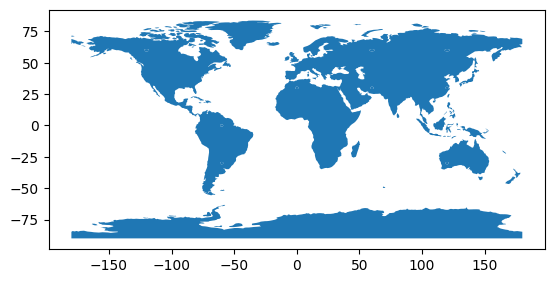

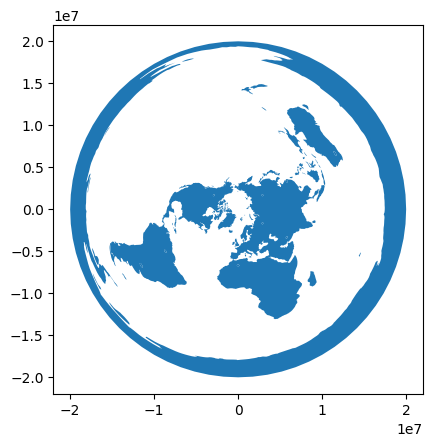

In [160]:
#fp = '../data/natural_earth/ne_110m_admin_0_countries2.shp'
#fp = '../data/natural_earth/ne_110m_land3.shp'
fp = '../data/natural_earth/ne_110m_admin_0_countries2_azqd.shp'
gdf = gpd.read_file(fp)
gdf2 = gdf.explode(index_parts=False)
gdf3 = gdf2[['featurecla', 'alt_x', 'alt_y', 'ref_pt', 'geometry']].copy()
#gdf3['area'] = gdf3.area
gdf4 = gdf3  # gdf3[gdf3['area']>1]
gdf4 = gdf4.reset_index(drop=True).reset_index().rename(columns={'index': 'id'})
gdf4.plot()
#gdf.plot()
this_crs = '+proj=aeqd +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs'  # UN logo
gdf4.to_crs(this_crs).plot()

<Axes: >

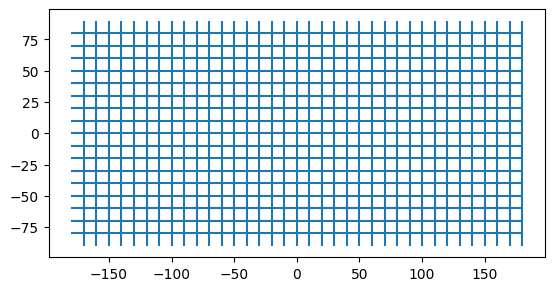

In [99]:
fp = '../data/natural_earth/ne_110m_graticules_10_b.shp'
grid = gpd.read_file(fp)
grid['display0'] = [d.replace(' ', '') for d in grid['display']]

grid.plot()

In [100]:
grid.head()

,degrees,direction,display,scalerank,dd,display0,geometry
0,80,N,80 N,4,80,80N,"LINESTRING (180.00000 79.99848, 179.99664 79.9..."
1,70,N,70 N,4,70,70N,"LINESTRING (180.00000 69.99847, 179.99664 69.9..."
2,60,N,60 N,4,60,60N,"LINESTRING (180.00000 59.99866, 179.99664 59.9..."
3,50,N,50 N,4,50,50N,"LINESTRING (179.99990 49.99876, 179.99664 49.9..."
4,40,N,40 N,4,40,40N,"LINESTRING (179.99990 39.99875, 179.99664 39.9..."


In [101]:
grid.geometry.tolist()[0].xy[0][-2:], grid.geometry.tolist()[0].xy[0][:2]

(array('d', [-179.49999406646376, -179.9999893871037]),
 array('d', [179.99999999999, 179.99664147371135]))

In [61]:
gdf4.head()

,id,featurecla,alt_x,alt_y,ref_pt,geometry
0,0,Admin-0 country,NaN,NaN,None,"POLYGON ((-163.71290 -78.59567, -163.71290 -78..."
1,1,Admin-0 country,NaN,NaN,None,"POLYGON ((-122.40624 -73.32462, -121.21151 -73..."
2,2,Admin-0 country,NaN,NaN,None,"POLYGON ((-100.78346 -72.50162, -101.80187 -72..."
3,3,Admin-0 country,NaN,NaN,None,"POLYGON ((-79.12031 8.99609, -79.55788 8.93237..."
4,4,Admin-0 country,NaN,NaN,None,"POLYGON ((-128.35841 50.77065, -127.30858 50.5..."


In [62]:
gdf4[gdf4['featurecla']=='cut']

,id,featurecla,alt_x,alt_y,ref_pt,geometry
92,92,cut,-122.013335,59.988916,S60-E60,"POLYGON ((-122.00942 60.07306, -121.98887 60.1..."
93,93,cut,-61.338557,-29.997474,N30-E120,"POLYGON ((-61.33404 -29.92769, -61.32146 -29.8..."
94,94,cut,-61.235258,0.000000,NS0-E120,"POLYGON ((-61.23220 0.06263, -61.22279 0.12634..."
95,95,cut,-1.338557,29.997474,S30-E180,"POLYGON ((-1.33518 30.06727, -1.32374 30.13769..."
96,96,cut,58.661443,29.997474,S30-W120,"POLYGON ((58.66482 30.06727, 58.67626 30.13769..."
97,97,cut,57.986665,59.988916,S60-W120,"POLYGON ((57.99058 60.07306, 58.01113 60.15699..."
98,98,cut,118.661443,-29.997474,N30-W60,"POLYGON ((118.66596 -29.92769, 118.67854 -29.8..."
99,99,cut,119.491235,-0.849762,NS0-W60,"POLYGON ((120.04087 -0.51966, 120.40663 -0.883..."
100,100,cut,118.661443,29.997474,S30-W60,"POLYGON ((118.66482 30.06727, 118.67626 30.137..."
101,101,cut,117.986665,59.988916,S60-W60,"POLYGON ((117.99058 60.07306, 118.01113 60.156..."


In [63]:
gdf4

,id,featurecla,alt_x,alt_y,ref_pt,geometry
0,0,Admin-0 country,NaN,NaN,None,"POLYGON ((-163.71290 -78.59567, -163.71290 -78..."
1,1,Admin-0 country,NaN,NaN,None,"POLYGON ((-122.40624 -73.32462, -121.21151 -73..."
2,2,Admin-0 country,NaN,NaN,None,"POLYGON ((-100.78346 -72.50162, -101.80187 -72..."
3,3,Admin-0 country,NaN,NaN,None,"POLYGON ((-79.12031 8.99609, -79.55788 8.93237..."
4,4,Admin-0 country,NaN,NaN,None,"POLYGON ((-128.35841 50.77065, -127.30858 50.5..."
...,...,...,...,...,...,...
97,97,cut,57.986665,59.988916,S60-W120,"POLYGON ((57.99058 60.07306, 58.01113 60.15699..."
98,98,cut,118.661443,-29.997474,N30-W60,"POLYGON ((118.66596 -29.92769, 118.67854 -29.8..."
99,99,cut,119.491235,-0.849762,NS0-W60,"POLYGON ((120.04087 -0.51966, 120.40663 -0.883..."
100,100,cut,118.661443,29.997474,S30-W60,"POLYGON ((118.66482 30.06727, 118.67626 30.137..."


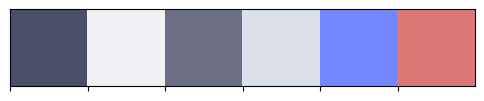

In [109]:
DARK = load_color('latte', 'text')
WHITE = load_color('latte', 'base')
LIGHTGRAY = load_color('latte', 'crust')
GRAY = load_color('latte', 'subtext0')
LINE = load_color('latte', 'lavender')
RED = load_color('latte', 'flamingo')
sns.palplot([DARK, WHITE, GRAY, LIGHTGRAY, LINE, RED])

In [67]:

for x in [y*30 for y in range(12)]:
    if x>180:
        x-=180
        x = -180+x
    print(x)

0
30
60
90
120
150
180
-150
-120
-90
-60
-30


In [68]:

for y in [90-y*30 for y in range(7)]:
    print(y)

90
60
30
0
-30
-60
-90


In [74]:
projections = {}
table_cells = defaultdict(list)
ref_points = {}
for i, x in enumerate([0, 60, 120, 180, -120, -60]):
    for j, y in enumerate([90-y*30 for y in range(7)]):
        x2 = 'E{}'.format(x) if x>0 else 'W{}'.format(abs(x)) if x<0 else 'EW{}'.format(x)
        y2 = 'N{}'.format(y) if y>0 else 'S{}'.format(abs(y)) if y<0 else 'NS{}'.format(y)
        n = '{}-{}'.format(y2, x2)
        #print(n)
        this_crs = '+proj=aeqd +lat_0={} +lon_0={} +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs'.format(y, x)
        projections[n] = this_crs
        table_cells[i].append(n)
        ref_points[n] = (x, y)
        #print(this_crs)
        #gdf4.to_crs(this_crs).plot(fc='none', ec='k')
        #grid.to_crs(this_crs).plot(fc='none', ec='k')
len(projections), table_cells


(42,
 defaultdict(list,
             {0: ['N90-EW0',
               'N60-EW0',
               'N30-EW0',
               'NS0-EW0',
               'S30-EW0',
               'S60-EW0',
               'S90-EW0'],
              1: ['N90-E60',
               'N60-E60',
               'N30-E60',
               'NS0-E60',
               'S30-E60',
               'S60-E60',
               'S90-E60'],
              2: ['N90-E120',
               'N60-E120',
               'N30-E120',
               'NS0-E120',
               'S30-E120',
               'S60-E120',
               'S90-E120'],
              3: ['N90-E180',
               'N60-E180',
               'N30-E180',
               'NS0-E180',
               'S30-E180',
               'S60-E180',
               'S90-E180'],
              4: ['N90-W120',
               'N60-W120',
               'N30-W120',
               'NS0-W120',
               'S30-W120',
               'S60-W120',
               'S90-W120'],
              5: ['N90-W6

In [75]:
check = 0
table_html = ''
lats = ['90 N', '60 N', '30 N', '0 NS', '30 S', '60 S', '90 S']
for j in range(7):
    #row = []
    row2 = '<tr><td>{}</td>'.format(lats[j])
    for i in range(6):
        #row.append()
        this_name = table_cells[i][j]
        if check==0:
            this_cell = '<td><a onclick="initial_proj()" id="but-{}" class="button">{}</a></td>\n'.format(this_name, this_name)
            check+=1
        else:
            this_cell = '<td><a onclick="run(\'{}\')" id="but-{}" class="button">{}</a></td>\n'.format(this_name, this_name, this_name)
        row2+=this_cell

    row2+='\n</tr>'
    #print(row)
    #print(row2)
    table_html+=row2
    #break
table_html

'<tr><td>90 N</td><td><a onclick="initial_proj()" id="but-N90-EW0" class="button">N90-EW0</a></td>\n<td><a onclick="run(\'N90-E60\')" id="but-N90-E60" class="button">N90-E60</a></td>\n<td><a onclick="run(\'N90-E120\')" id="but-N90-E120" class="button">N90-E120</a></td>\n<td><a onclick="run(\'N90-E180\')" id="but-N90-E180" class="button">N90-E180</a></td>\n<td><a onclick="run(\'N90-W120\')" id="but-N90-W120" class="button">N90-W120</a></td>\n<td><a onclick="run(\'N90-W60\')" id="but-N90-W60" class="button">N90-W60</a></td>\n\n</tr><tr><td>60 N</td><td><a onclick="run(\'N60-EW0\')" id="but-N60-EW0" class="button">N60-EW0</a></td>\n<td><a onclick="run(\'N60-E60\')" id="but-N60-E60" class="button">N60-E60</a></td>\n<td><a onclick="run(\'N60-E120\')" id="but-N60-E120" class="button">N60-E120</a></td>\n<td><a onclick="run(\'N60-E180\')" id="but-N60-E180" class="button">N60-E180</a></td>\n<td><a onclick="run(\'N60-W120\')" id="but-N60-W120" class="button">N60-W120</a></td>\n<td><a onclick="ru

In [76]:
gdf4.head()

,id,featurecla,alt_x,alt_y,ref_pt,geometry
0,0,Admin-0 country,NaN,NaN,None,"POLYGON ((-163.71290 -78.59567, -163.71290 -78..."
1,1,Admin-0 country,NaN,NaN,None,"POLYGON ((-122.40624 -73.32462, -121.21151 -73..."
2,2,Admin-0 country,NaN,NaN,None,"POLYGON ((-100.78346 -72.50162, -101.80187 -72..."
3,3,Admin-0 country,NaN,NaN,None,"POLYGON ((-79.12031 8.99609, -79.55788 8.93237..."
4,4,Admin-0 country,NaN,NaN,None,"POLYGON ((-128.35841 50.77065, -127.30858 50.5..."


In [333]:
def process_globe(the_gdf, k, crs):
    tmp_gdf = the_gdf[the_gdf['ref_pt']!=k]
    alt_gdf = the_gdf[the_gdf['ref_pt']==k].copy()
    #print(len(tmp_gdf), len(alt_gdf))
    if len(alt_gdf)==0:
        the_gdf = tmp_gdf.to_crs(crs)
        the_gdf = the_gdf.sort_values(by='id')
    else:
        #print(k, len(tmp_gdf), len(alt_gdf))
        tmp_gdf = tmp_gdf.to_crs(crs)
        alx = alt_gdf['alt_x'].tolist()[0]
        aly = alt_gdf['alt_y'].tolist()[0]
        alt_pt = Point(alx, aly)
        alt_ptb = gpd.GeoSeries([alt_pt], crs='epsg:4326').to_crs(crs).buffer(0.1)
        alt_ptb = alt_ptb.tolist()[0]
        alt_gdf['geometry'] = [alt_ptb]
        alt_gdf.crs = tmp_gdf.crs
        the_gdf = pd.concat([tmp_gdf, alt_gdf])
        the_gdf = the_gdf.sort_values(by='id')
    #print(len(the_gdf))
    the_gdf['geometry'] = the_gdf.make_valid()
    #the_gdf = the_gdf[the_gdf.is_valid]
    #print(len(the_gdf))
    #print(len(the_gdf))
    geoms_list = []
    for i, g in enumerate(the_gdf.geometry):
        if (isinstance(g, GeometryCollection)):  
            # the headache part
            #print(g)
            g2 = None
            for j in range(len(g.geoms)):
                j_item = g.geoms[j]
                if isinstance(j_item, Polygon):
                    #print(j_item)
                    g2 = j_item
            g = g2
        geoms_list.append(g)
    the_gdf['geometry'] = geoms_list
    #print(len(the_gdf))
    return the_gdf

Empty GeoDataFrame
Columns: [id, featurecla, alt_x, alt_y, ref_pt, geometry]
Index: []


/home/benny/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

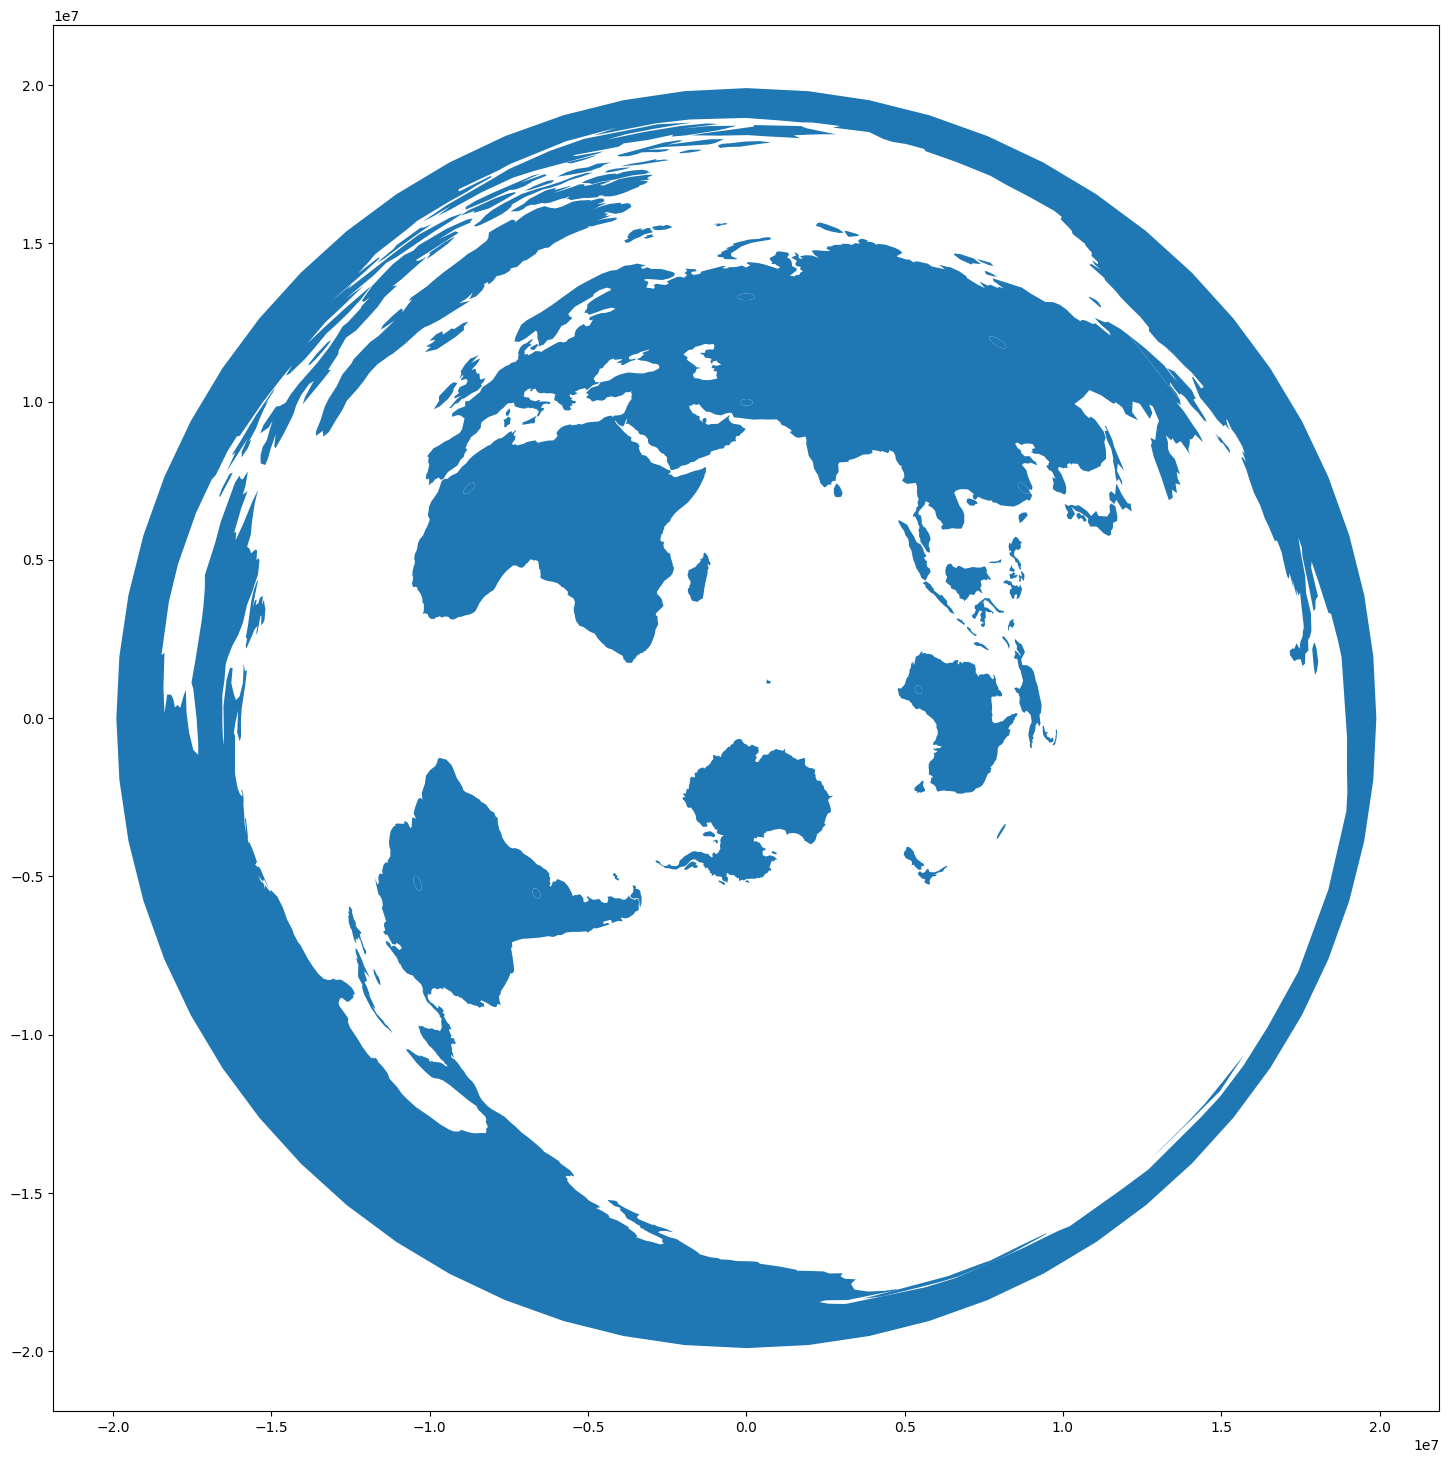

In [334]:
k = 'S60-E60'
crs = projections[k]
the_grid = grid.to_crs(crs).copy()
the_gdf = gdf4.copy()
the_gdf = process_globe(the_gdf, k, crs)
tmp = the_gdf[~the_gdf.is_valid]
print(tmp)

fig, ax = plt.subplots(figsize=(18, 18))
#ax.set_aspect('equal')
#gdf4.plot(ax=ax)
#the_grid.plot(ax=ax, ec='grey')
the_gdf.plot(ax=ax, ec='none')
tmp.plot(ax=ax, fc='r', ec='k')


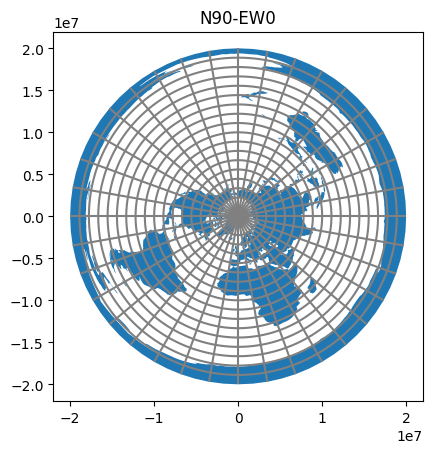

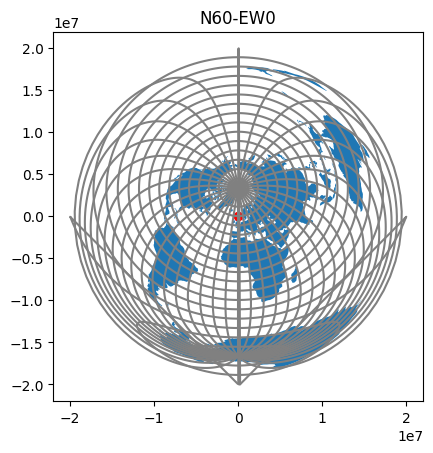

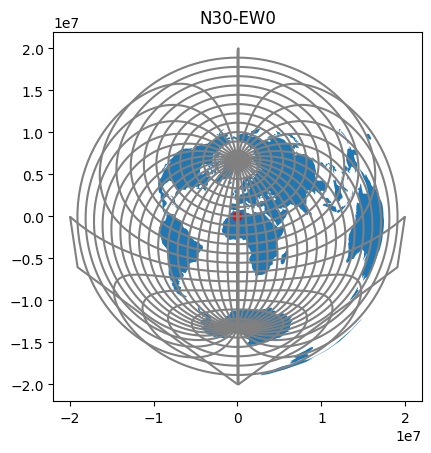

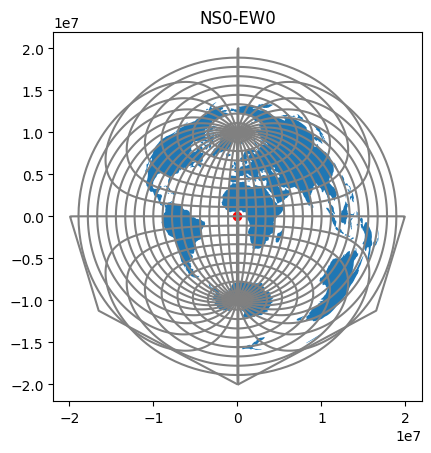

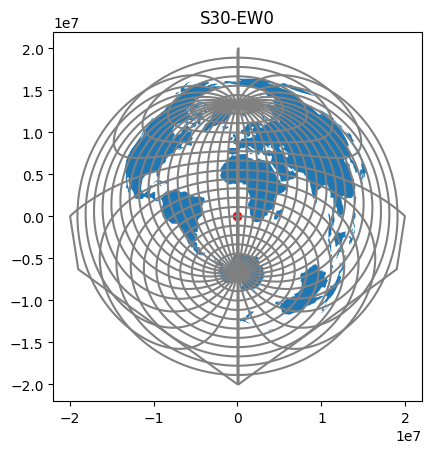

In [251]:
check = 0
#something is wrong
for k, crs in projections.items():
    the_grid = grid.to_crs(crs).copy()
    the_gdf = gdf4.copy()
    the_gdf = process_globe(the_gdf, k, crs)

    lon0, lat0 = ref_points[k]
    pt2 = Point(lon0, lat0)
    pt2b = gpd.GeoSeries([pt2], crs='epsg:4326').to_crs(crs)
    
    fig, ax = plt.subplots()
    #ax.set_aspect('equal')
    #gdf4.plot(ax=ax)
    the_grid.plot(ax=ax, ec='grey')
    the_gdf.plot(ax=ax)
    pt2b.plot(ax=ax, c='r')
    ax.set_title(k)
    check+=1
    if check==5:
        break

POLYGON ((627415.9739829674 -6960126.583809147, 691937.6936538572 -6997736.996507188, 642238.6391797445 -6999149.14104272, 645566.9501060796 -7002140.817345823, 675342.2185161923 -7029921.0406224765, 672999.1176272338 -7030668.999292436, 671241.6725645385 -7031418.691099145, 612381.4304203474 -7021197.181177409, 649918.6792839819 -7057971.846640534, 654472.9258081842 -7063637.38856262, 648416.6978704433 -7103268.086980581, 614607.7580486181 -7096626.711560468, 597652.7778459872 -7092722.322120911, 549420.991783559 -7082278.690096813, 498885.5162339361 -7085632.946238269, 449083.0355018365 -7077120.595757874, 394455.7335394137 -7081925.075829042, 391475.53481803904 -7122568.322868808, 335373.9596840323 -7127696.784109164, 290462.73080958345 -7109095.04894705, 283959.46487037995 -7149144.127146916, 270812.22858818405 -7188176.2670020275, 294742.67867494177 -7236802.100266417, 344148.5769804382 -7221845.180473897, 398518.2881705497 -7226440.525622698, 437519.9160610323 -7257863.724825019,

Text(0.5, 1.0, 'S30-E60')

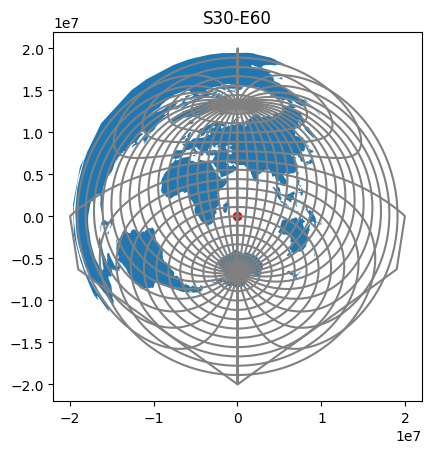

In [252]:
k = 'S30-E60'
crs = projections[k]
the_grid = grid.to_crs(crs).copy()
the_gdf = gdf4.copy()
the_gdf = process_globe(the_gdf, k, crs)
print(the_gdf)
print(len(the_gdf))
the_gdf['geometry'] = the_gdf.make_valid()
the_gdf = the_gdf[the_gdf.is_valid]
print(len(the_gdf))

lon0, lat0 = ref_points[k]
pt2 = Point(lon0, lat0)
pt2b = gpd.GeoSeries([pt2], crs='epsg:4326').to_crs(crs)

fig, ax = plt.subplots()
#ax.set_aspect('equal')
#gdf4.plot(ax=ax)
the_grid.plot(ax=ax, ec='grey')
the_gdf.plot(ax=ax)
pt2b.plot(ax=ax, c='r')
ax.set_title(k)

<Axes: >

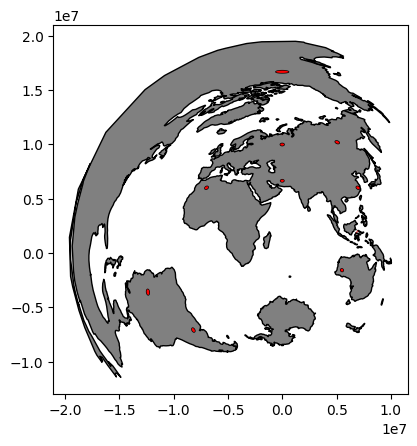

In [253]:

fig, ax = plt.subplots()
the_gdf[the_gdf['featurecla']!='cut'].plot(ax=ax, fc='grey', ec='k')
the_gdf[the_gdf['featurecla']=='cut'].plot(ax=ax, fc='red')
#the_gdf

In [254]:
the_gdf

,id,featurecla,alt_x,alt_y,ref_pt,geometry
0,0,Admin-0 country,NaN,NaN,None,"POLYGON ((1122952.364 -7549257.745, 1122952.44..."
1,1,Admin-0 country,NaN,NaN,None,"POLYGON ((105912.210 -8541773.507, 52710.992 -..."
2,2,Admin-0 country,NaN,NaN,None,"POLYGON ((-869881.850 -8496144.717, -836380.05..."
3,3,Admin-0 country,NaN,NaN,None,"MULTIPOLYGON (((-18953690.878 4649309.114, -19..."
4,4,Admin-0 country,NaN,NaN,None,"POLYGON ((4332704.089 17054271.635, 3889272.98..."
...,...,...,...,...,...,...
98,98,cut,57.986665,59.988916,S60-W120,"POLYGON ((-175493.417 9982487.474, -173418.709..."
99,99,cut,118.661443,-29.997474,N30-W60,"POLYGON ((5389448.511 -1505638.412, 5394816.36..."
100,100,cut,119.491235,-0.849762,NS0-W60,"POLYGON ((6869515.920 1898495.166, 6899363.038..."
101,101,cut,118.661443,29.997474,S30-W60,"POLYGON ((6811670.820 6034632.090, 6811252.597..."


In [255]:
the_gdf.iloc[45]#['geometry']

id                                                           45
featurecla                                      Admin-0 country
alt_x                                                       NaN
alt_y                                                       NaN
ref_pt                                                     None
geometry      POLYGON ((-5173871.742058333 7286237.035057386...
Name: 45, dtype: object

<Axes: >

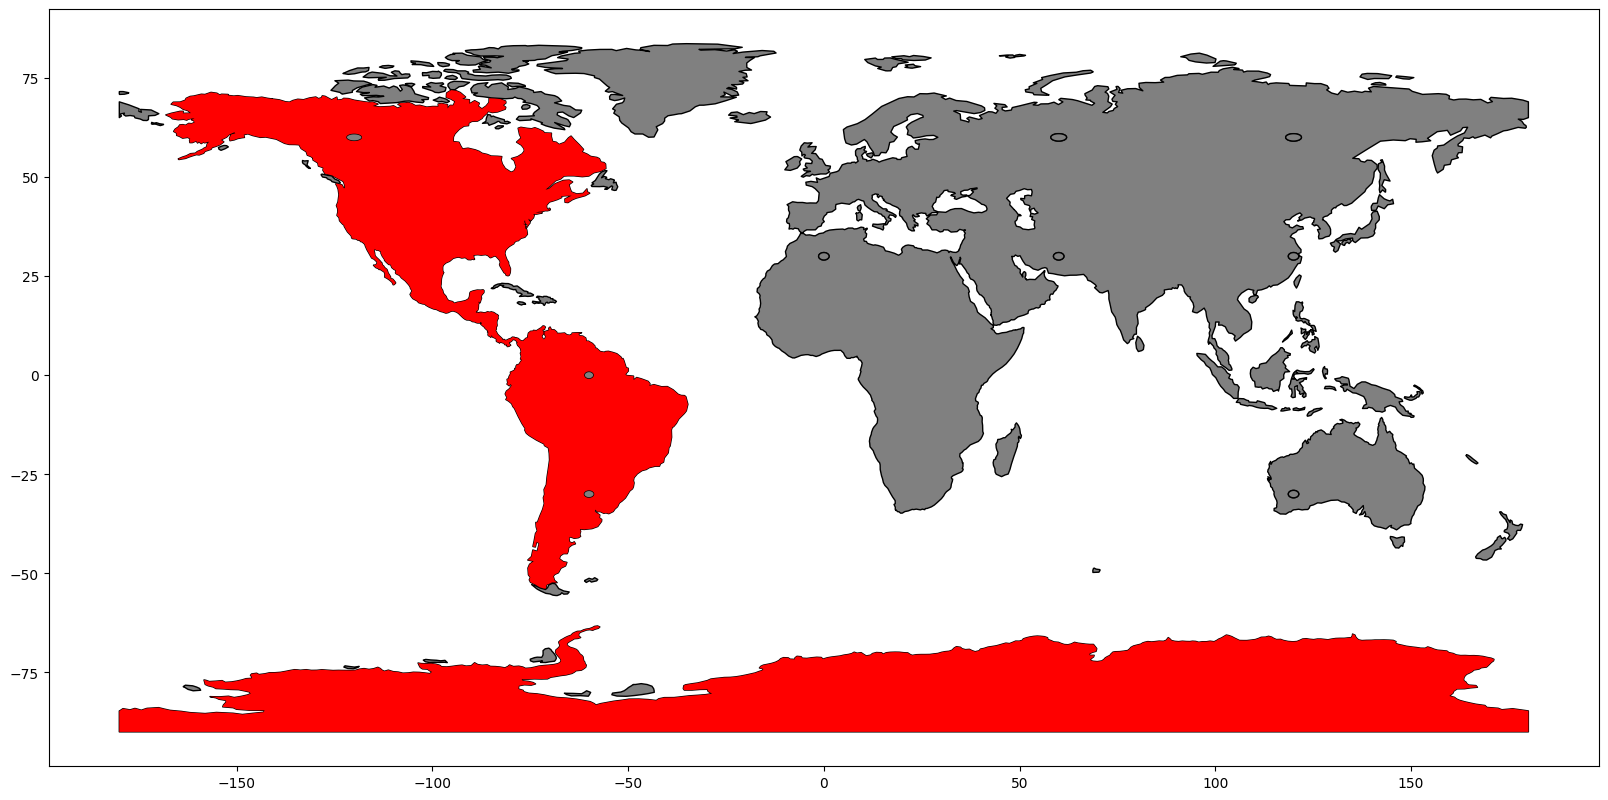

In [256]:

fig, ax = plt.subplots(figsize=(20, 10))
gdf4.plot(ax=ax, fc='grey', ec='k')
gdf4[gdf4['id']==44].plot(ax=ax, fc='r')
gdf4[gdf4['id']==3].plot(ax=ax, fc='r')

In [257]:

for i, g in enumerate(gdf4.geometry):
    if not(isinstance(g, Polygon)):
        print(i, g)

Text(0.5, 1.0, 'S60-E60')

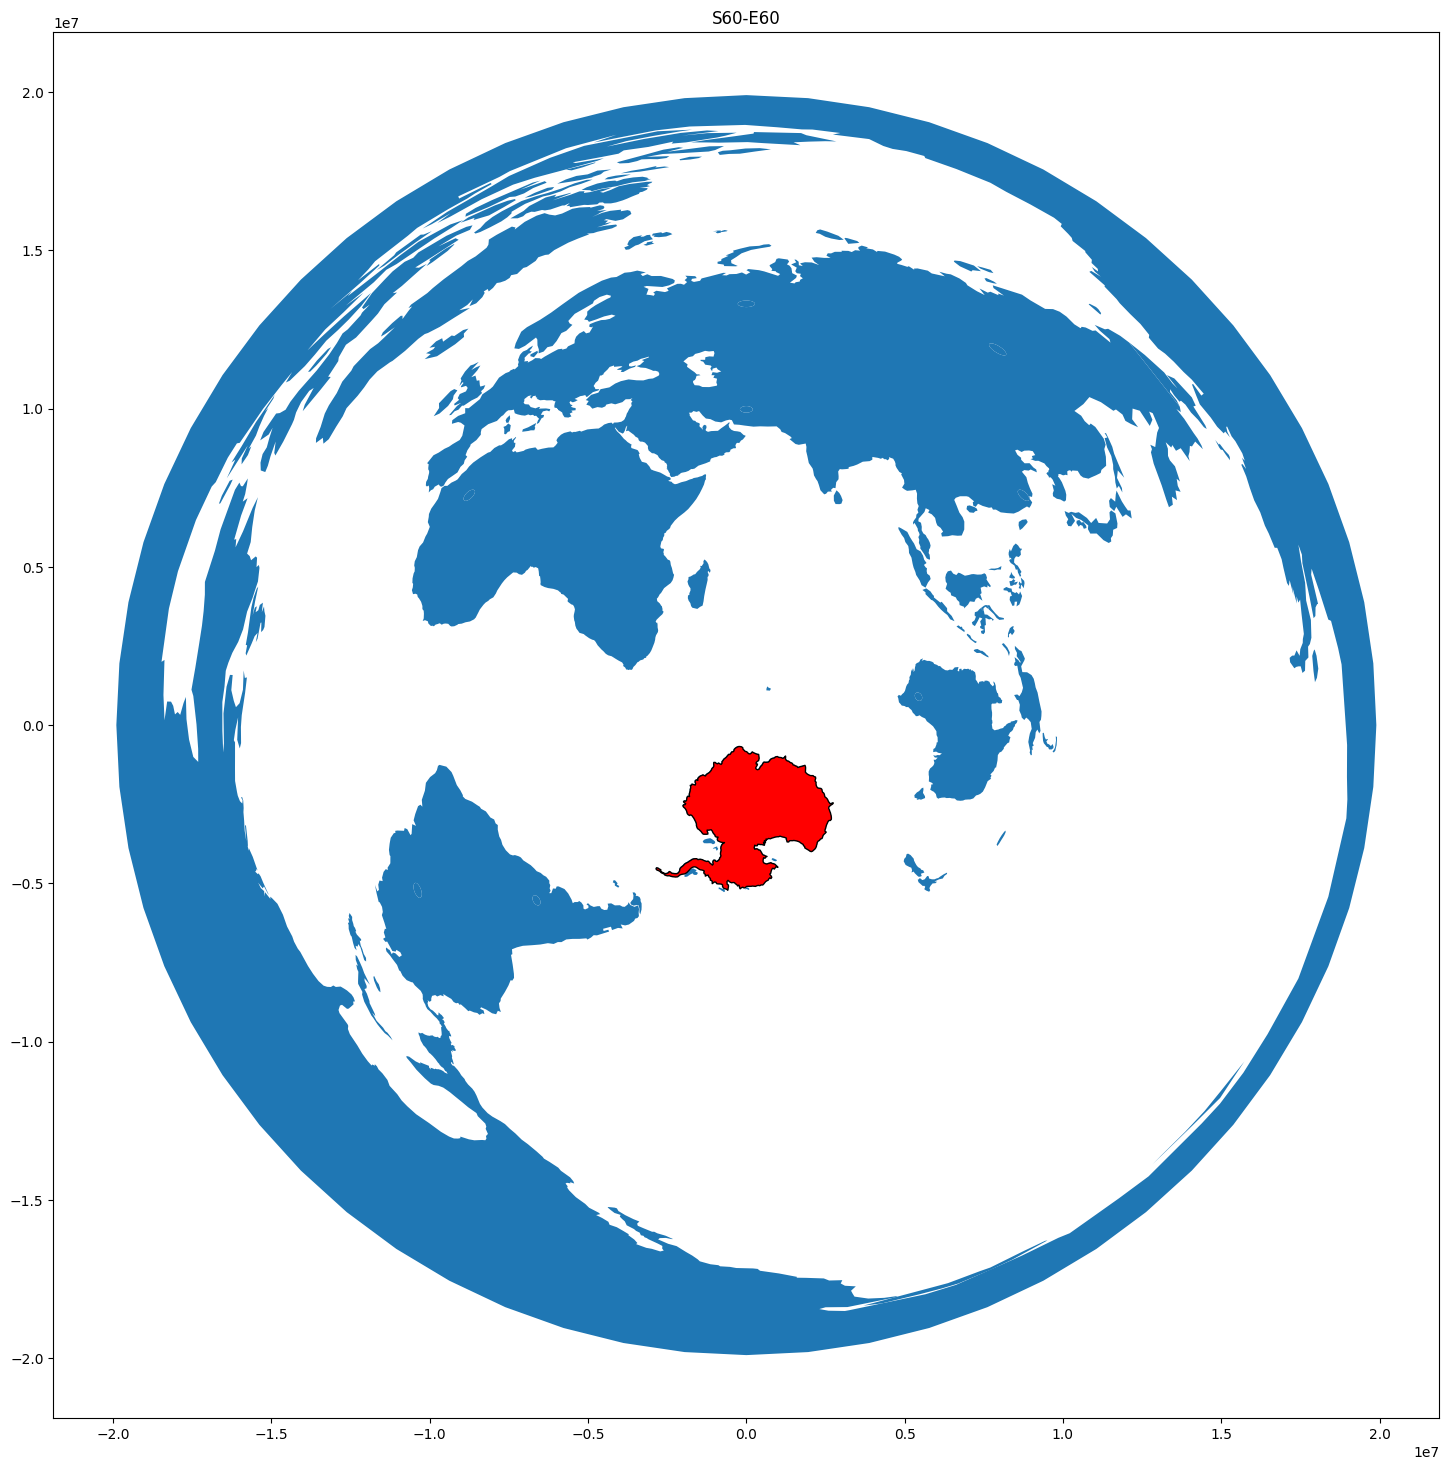

In [308]:
k = 'S60-E60'
crs = projections[k]
the_grid = grid.to_crs(crs).copy()
the_gdf = gdf4.copy()
the_gdf = process_globe(the_gdf, k, crs)
#print(the_gdf)
#print(len(the_gdf))


lon0, lat0 = ref_points[k]
pt2 = Point(lon0, lat0)
pt2b = gpd.GeoSeries([pt2], crs='epsg:4326').to_crs(crs)

fig, ax = plt.subplots(figsize=(18, 18))
#ax.set_aspect('equal')
#gdf4.plot(ax=ax)
#the_grid.plot(ax=ax, ec='grey')
the_gdf.plot(ax=ax, ec='none')
the_gdf[the_gdf['id']==44].plot(ax=ax, fc='r', ec='k')


#pt2b.plot(ax=ax, c='r')
ax.set_title(k)

In [276]:
the_gdf[the_gdf['id']==93]#.plot()

,id,featurecla,alt_x,alt_y,ref_pt,geometry


In [277]:
len(the_gdf)

102

In [279]:
len(gdf4)

103

In [105]:

lon0, lat0 = ref_points[k]
pt2 = Point(lon0, lat0)
pt2_df = pd.DataFrame({'ref_pt': [k], 'ref_id': ['the_ref_point']})
pt2b = gpd.GeoDataFrame(pt2_df, geometry=[pt2], crs='epsg:4326').to_crs(crs)
pt2b

,ref_pt,ref_id,geometry
0,S30-EW0,the_ref_point,POINT (0.000 0.000)


In [345]:
def add_grid(m, the_grid, vis):
    m.add_geodataframe(the_grid, layername='the-grid', 
        draw_setting=dict(labelby='display0', idby='display2'),
        strokecolor=LINE, opacity=0.7,
        strokewidth=30000, showlabel=False, visibility=vis)

In [346]:
def generate_svg2(m, the_gdf, title, vis):
    #m = vmapper.Map(interactive=False, params={'bgcolor': WHITE})
    """
    m.add_geodataframe(the_grid, layername='{}-grid'.format(title.replace(' ', '_')), 
        draw_setting=dict(labelby='display0', idby='display2'),
        strokecolor=LINE, opacity=0.7,
        strokewidth=30000, showlabel=False, visibility=vis)
    """
    m.add_geodataframe(the_gdf, layername='{}-land'.format(title.replace(' ', '_')), 
        draw_setting=dict(labelby='id', idby='id2'), 
        color=DARK, opacity=0.6, strokecolor=DARK, strokewidth=0, showlabel=False, 
        visibility=vis)
    #m.add_title(title+' Projection')

In [347]:
m = vmapper.Map(interactive=False, params={'bgcolor': WHITE})

check = 0
proj_list = []
for k, crs in projections.items():
    k2 = k.replace(' ', '_')
    vis = 'hidden' if check>0 else 'visible'
    the_grid = grid.to_crs(crs).copy()
    if check==0:
        the_grid['display2'] = ['{}-{}'.format(k2, i) for i in the_grid['display0']]
        add_grid(m, the_grid, vis)
        lon0, lat0 = ref_points[k]
        pt2 = Point(lon0, lat0)
        pt2_df = pd.DataFrame({'ref_pt': [k], 'ref_id': ['the_ref_point']})
        ref_gdf = gpd.GeoDataFrame(pt2_df, geometry=[pt2], crs='epsg:4326').to_crs(crs)


    the_gdf = gdf4.copy() 
    the_gdf = process_globe(the_gdf, k, crs)
    #the_gdf['geometry'] = the_gdf.make_valid()
    #the_gdf = check_geom(the_gdf, gdf4)
    the_gdf['id2'] = ['{}-{}'.format(k2, i) for i in the_gdf['id']]
    #print(the_gdf)
    generate_svg2(m, the_gdf, k, vis)
    
    proj_list.append(k)
    print(k)
    check+=1
    #if check==4:
    #    break


N90-EW0
N60-EW0
N30-EW0
NS0-EW0
S30-EW0
S60-EW0
S90-EW0
N90-E60
N60-E60
N30-E60
NS0-E60
S30-E60
S60-E60
S90-E60
N90-E120
N60-E120
N30-E120
NS0-E120
S30-E120
S60-E120
S90-E120
N90-E180
N60-E180
N30-E180
NS0-E180
S30-E180
S60-E180
S90-E180
N90-W120
N60-W120
N30-W120
NS0-W120
S30-W120
S60-W120
S90-W120
N90-W60
N60-W60
N30-W60
NS0-W60
S30-W60
S60-W60
S90-W60


In [348]:

m.add_geodataframe(ref_gdf, layername='ref_point', draw_setting=dict(labelby='ref_id', idby='ref_id'), radius=160000, color=RED, opacity=0.8, strokecolor=RED, strokewidth=10000, showlabel=False)

In [349]:
svgText = m.make_scene()
#print(outputText)


In [350]:
temp_vars = {'first_title': proj_list[0], 
             'first_proj4': projections[proj_list[0]],
             'content': svgText,
             'projections_collection': proj_list[1:],
             'projs': projections,
             'table_html': table_html,
}
temp_vars['first_title']

'N90-EW0'

In [339]:
templateLoader = jinja2.FileSystemLoader( searchpath="." )
templateEnv = jinja2.Environment( loader=templateLoader )
TEMPLATE_FILE = "map_templateb_table.html"

template = templateEnv.get_template( TEMPLATE_FILE )
outputText = template.render( temp_vars )

outputfn = 'test4b.html'

with open(outputfn, 'wb') as f:
    f.write(outputText.encode("utf-8"))